In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:

# Question 1
# Defining x, y variables and sample size 
def generate_dataset():
    np.random.seed(0)
    num_samples = 2000 # variable input
    x = np.random.uniform(-5, 5, num_samples) # x range can be varied desirably
    y = np.random.uniform(-5, 5, num_samples) # y range can be varied desirably
    f = lambda x, y: 2 * x**3 - 3 * x**2 * y + 4 * x * y**2 - 2 * y**3 + 5 
    z = f(x, y)
    return x, y, z
x, y, z = generate_dataset()

# preparing excel sheet
data = pd.DataFrame({'x': x, 'y': y, 'f(x,y)': z})
data.to_excel('data1.xlsx', index=False) # excel generated and stored locally

# Reading data from Excel and change into inputs and outputs
data = pd.read_excel('data1.xlsx')
inputs = data[['x', 'y']].values
outputs = data['f(x,y)'].values

#Normalizing the data between 0 and 1
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
inputs_scaled = scaler.fit_transform(inputs)
outputs_scaled = scaler.fit_transform(outputs.reshape(-1, 1))

# Splitting the data into training, validation, and testing sets as per the question (75%,15%,15%)
from sklearn.model_selection import train_test_split
X_train, X_temp, y_train, y_temp = train_test_split(inputs_scaled, outputs_scaled, test_size=0.3, random_state=0)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=0)

# Question 2

from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow as tf
# Creating an artificial neural network model with 2 hidden layer with activation function-Rectified linear(relu) 
model_adam = Sequential()
model_adam.add(Dense(5, input_dim=2, activation='relu'))  # First hidden layer with 5 nodes
model_adam.add(Dense(3, activation='relu'))  # Second hidden layer with 3 nodes
model_adam.add(Dense(1))  # Output layer with 1 node

# Question 3
# Training the neural network using Adam optimizer and MSE loss function
model_adam.compile(optimizer='adam', loss='mean_squared_error')

# Training the model on the data
model_adam.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

# Evaluating the model on the training and testing data
from sklearn.metrics import mean_squared_error, r2_score 
y_train_pred_adam = model_adam.predict(X_train)
y_test_pred_adam = model_adam.predict(X_test)
mse_train_adam = mean_squared_error(y_train, y_train_pred_adam)
r2_train_adam = r2_score(y_train, y_train_pred_adam)
mse_test_adam = mean_squared_error(y_test, y_test_pred_adam)
r2_test_adam = r2_score(y_test, y_test_pred_adam)

Epoch 1/50
44/44 [==============================] - 1s 7ms/step - loss: 0.0246 - val_loss: 0.0204
Epoch 2/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0171 - val_loss: 0.0148
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0125 - val_loss: 0.0110
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0094 - val_loss: 0.0085
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0073 - val_loss: 0.0066
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0049 - val_loss: 0.0045
Epoch 8/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0036
Epoch 9/50
44/44 [==============================] - 0s 3ms/step - loss: 0.0030 - val_loss: 0.0023
Epoch 10/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0021 - val_loss: 0.0017
Epoch 11/50
44/44 [

In [70]:
# Training the neural network using RMSprop optimizer
model_rmsprop = Sequential()
model_rmsprop.add(Dense(5, input_dim=2, activation='relu'))  # First hidden layer with 5 nodes
model_rmsprop.add(Dense(3, activation='relu'))  # Second hidden layer with 3 nodes
model_rmsprop.add(Dense(1))  # Output layer with 1 node

In [71]:
# Compile the model with RMSProp optimizer and MSE loss function
model_rmsprop.compile(optimizer='rmsprop', loss='mean_squared_error')

In [72]:
# Train the model with RMSProp optimizer
model_rmsprop.fit(X_train, y_train, epochs=50, validation_data=(X_val, y_val))

Epoch 1/50
44/44 [==============================] - 1s 5ms/step - loss: 0.2162 - val_loss: 0.1570
Epoch 2/50
44/44 [==============================] - 0s 3ms/step - loss: 0.1166 - val_loss: 0.0801
Epoch 3/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0553 - val_loss: 0.0339
Epoch 4/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0260 - val_loss: 0.0182
Epoch 5/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0160 - val_loss: 0.0121
Epoch 6/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0113 - val_loss: 0.0089
Epoch 7/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0084 - val_loss: 0.0066
Epoch 8/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0059 - val_loss: 0.0045
Epoch 9/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0041 - val_loss: 0.0032
Epoch 10/50
44/44 [==============================] - 0s 2ms/step - loss: 0.0030 - val_loss: 0.0025
Epoch 11/50
44/44 [

In [73]:
y_train_pred_rmsprop = model_rmsprop.predict(X_train)
y_test_pred_rmsprop = model_rmsprop.predict(X_test)
mse_train_rmsprop = mean_squared_error(y_train, y_train_pred_rmsprop)
r2_train_rmsprop = r2_score(y_train, y_train_pred_rmsprop)
mse_test_rmsprop = mean_squared_error(y_test, y_test_pred_rmsprop)
r2_test_rmsprop = r2_score(y_test, y_test_pred_rmsprop)

10/10 [==============================] - 0s 784us/step


Adam Optimizer Results:
Mean Squared Error (Training): 0.00017977160990959877
R^2 Score (Training): 0.9852758586747783
Mean Squared Error (Testing): 0.0001501982273004814
R^2 Score (Testing): 0.9864952977410429

RMSProp Optimizer Results:
Mean Squared Error (Training): 0.0017403366235753312
R^2 Score (Training): 0.8574582359702494
Mean Squared Error (Testing): 0.001467444043474377
R^2 Score (Testing): 0.8680583969266458


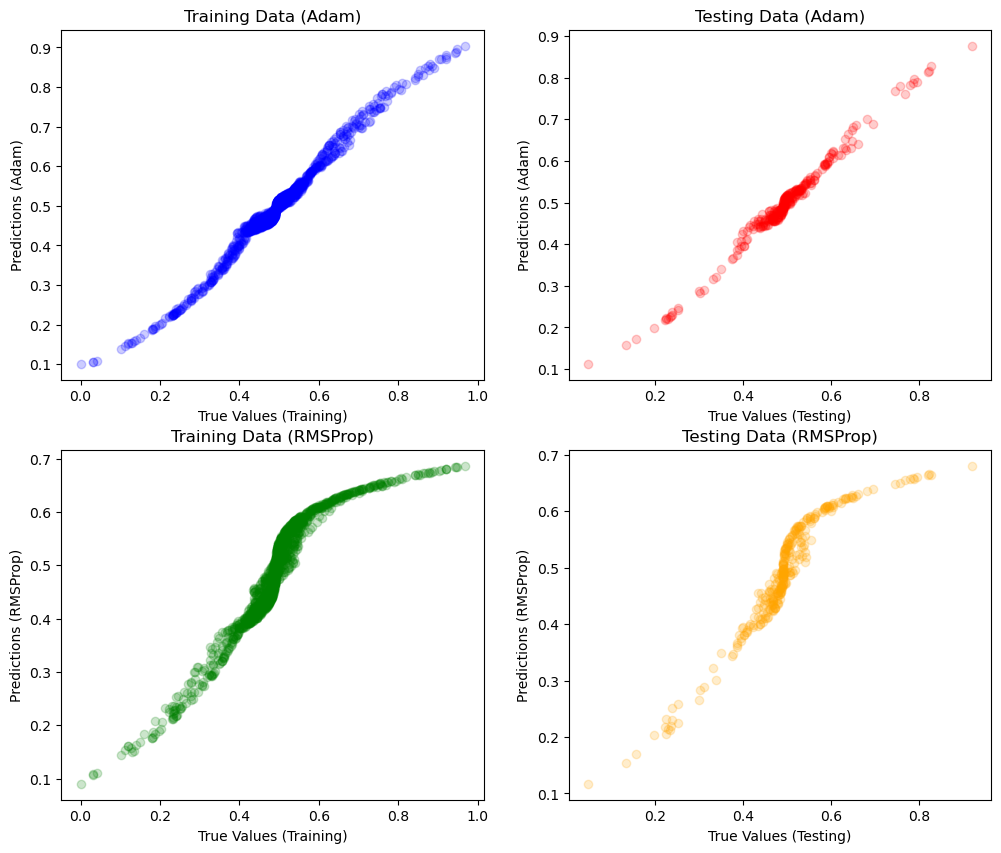

In [77]:
# Question 4, 5, 6
# Printing the outputs
print("Adam Optimizer Results:")
print(f"Mean Squared Error (Training): {mse_train_adam}")
print(f"R^2 Score (Training): {r2_train_adam}")
print(f"Mean Squared Error (Testing): {mse_test_adam}")
print(f"R^2 Score (Testing): {r2_test_adam}")
print("\nRMSProp Optimizer Results:")
print(f"Mean Squared Error (Training): {mse_train_rmsprop}")
print(f"R^2 Score (Training): {r2_train_rmsprop}")
print(f"Mean Squared Error (Testing): {mse_test_rmsprop}")
print(f"R^2 Score (Testing): {r2_test_rmsprop}")

# Compare performance between Adam and RMSProp on training and testing data by plotting the True and Predicted values of both test and training data
plt.figure(figsize=(12, 10))
plt.subplot(2, 2, 1)
plt.scatter(y_train, y_train_pred_adam, c='blue', alpha=0.2)
plt.xlabel('True Values (Training)')
plt.ylabel('Predictions (Adam)')
plt.title('Training Data (Adam)')

plt.subplot(2, 2, 2)
plt.scatter(y_test, y_test_pred_adam, c='red', alpha=0.2)
plt.xlabel('True Values (Testing)')
plt.ylabel('Predictions (Adam)')
plt.title('Testing Data (Adam)')

plt.subplot(2, 2, 3)
plt.scatter(y_train, y_train_pred_rmsprop, c='green', alpha=0.2)
plt.xlabel('True Values (Training)')
plt.ylabel('Predictions (RMSProp)')
plt.title('Training Data (RMSProp)')

plt.subplot(2, 2, 4)
plt.scatter(y_test, y_test_pred_rmsprop, c='orange', alpha=0.2)
plt.xlabel('True Values (Testing)')
plt.ylabel('Predictions (RMSProp)')
plt.title('Testing Data (RMSProp)')

plt.show()